In [1]:
import os
import pynbody
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets
import simulation

In [2]:
bands_available = ['u', 'b', 'v', 'r', 'i', 'j', 'h', 'k']
nbands = len(bands_available)

In [3]:
wavelength_avail = {'u':3571, 'b':4378, 'v':5466, 'r':6695, 
                    'i':8565, 'j':12101, 'h':16300, 'k':21900} # in Angstrom

In [4]:
snap_name = "/home/michele/sim/MoRIA/M1-10_Verbeke2017/M10sim41001/snapshot_0036"
s = pynbody.load(snap_name)
s.properties

{'time': Unit("1.34e+01 s kpc km**-1")}

In [5]:
sim = simulation.Simulation(os.path.dirname(snap_name))

loading simulation: /home/michele/sim/MoRIA/M1-10_Verbeke2017/M10sim41001
Parameter file not found: [Errno 2] No such file or directory: '/home/michele/sim/MoRIA/M1-10_Verbeke2017/M10sim41001/parameters-usedvalues'. But continuing
Found 37 snapshots
Loading cosmological parameters


In [6]:
sim[0].properties

{'time': Unit("1.17e+01 s kpc km**-1")}

In [7]:
from pynbody.analysis.luminosity import halo_mag
wavelengths = np.array([wavelength_avail[band] for band in bands_available])

def compute_seds(sim):
    seds = np.zeros((len(sim), nbands))
    for i, snap in enumerate(sim):
        seds[i] = np.array([halo_mag(snap, band=b) for b in bands_available])
    return seds
def plot_sed(sed, ax):
    ax.plot(wavelengths, sed, 'x-');
    ax.set_xlabel("$\lambda [\AA]$")
    ax.set_ylabel("SED [mag]");

In [8]:
seds = compute_seds(sim)

In [23]:
snap_slider = ipywidgets.IntSlider(min=0,max=len(sim)-1,step=1,value=0, continuous_update=True, description='Snap:')
def k(i):
    snap = sim[i].s
    fig, (ax_sfh, ax_sed) = plt.subplots(ncols=2, figsize=(12,4))
    time = snap.properties['time'].in_units('Gyr')
    pynbody.plot.sfh(sim[-1], subplot=ax_sfh);
    ax_sfh.axvline(time, color='r')
    plot_sed(seds[i], ax=ax_sed);
    ax_sed.set_ylim(seds.max()+0.5, seds.min()-0.5)
    fig.suptitle('t = {:.2f}'.format(time))

w = ipywidgets.interactive(k, i=snap_slider)
w

interactive(children=(IntSlider(value=0, description='Snap:', max=36), Output()), _dom_classes=('widget-intera…

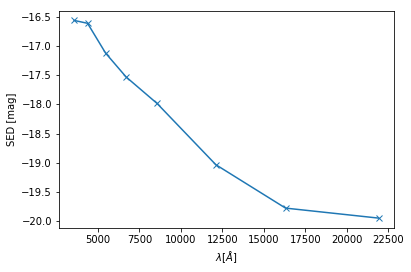

In [9]:
fig, ax = plt.subplots()
plot_sed(seds[0], ax);

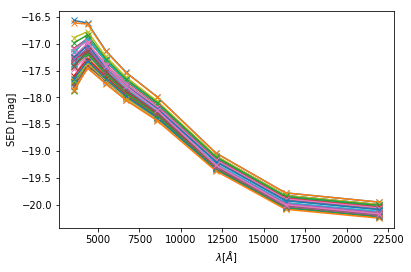

In [10]:
fig, ax = plt.subplots()
for sed in seds:
    plot_sed(sed, ax);

/home/michele/Software/miniconda3/lib/python3.6/site-packages/pynbody/simdict.py:92: RuntimeWarning: Assuming default value for property 'omegaM0'=3.09e-01
  name, value), RuntimeWarning)
/home/michele/Software/miniconda3/lib/python3.6/site-packages/pynbody/simdict.py:92: RuntimeWarning: Assuming default value for property 'omegaL0'=6.91e-01
  name, value), RuntimeWarning)
/home/michele/Software/miniconda3/lib/python3.6/site-packages/pynbody/simdict.py:92: RuntimeWarning: Assuming default value for property 'a'=1.00e+00
  name, value), RuntimeWarning)


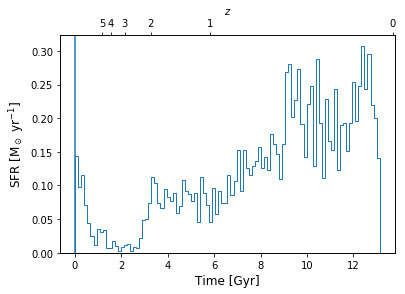

In [13]:
fig, ax = plt.subplots()
pynbody.plot.sfh(s.s);
ax.axvline()

In [14]:
sim[-1].properties['time'].in_units('Gyr')

13.132382761798997